In [1]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
print(len(train_X), len(test_X))

404 102


In [6]:
print(train_X[0])
print(train_Y[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


훈련 데이터는 학습과정에 사용됨

테스트 데이터는 학습결과를 평가하기 위한 데이터

학습할땐 훈련데이터만, 테스트 데이터는 볼 수 없음

훈련데이터로 학습 시 일부 데이터를 떼어내 검증 데이터로 만들 수 있음

학습이 잘 되고 있는지 검증하는 용도로 쓰이며 검증 데이터의 성적이 잘 나오지 않을 때 학습 중단 가능.

딥러닝 네트워크의 가중치에 영향을 주는 데이터는 훈련 데이터뿐이다.

서로 다른 단위의 데이터를 처리하기 위해 전처리 과정이 필요함(정규화)

데이터를 정규화하려면 각 데이터에서 평균값을 뺀 다음 표준편차로 나눈다. 이는 데이터의 분포를 정규분포로 옮기는 역할을 한다. 평균 및 표준편차를 구할 땐 훈련데이터의 평균과 표준편차를 구한 후 이것으로 테스트 데이터도 졍규화한다.

In [7]:
#전처리 결과 데이터가 정규분포에 들어가도록 바뀌었다
x_mean = train_X.mean()
x_std = train_X.std()
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean()
y_std = train_Y.std()
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


In [15]:
import tensorflow as tf
from tensorflow import keras
model = tf.keras.Sequential([
    #주택가격을 제외한 X데이터의 속성을 모두 불러오기 위해 input_shape의 첫번째 차원을 13을 지정.
    tf.keras.layers.Dense(units=52, activation = 'relu', input_shape = (13,)),
    #여러개의 레이어를 겹쳐 사용할 때 sigmoid나 tanh보다 좋은 결과를 얻을 수 잇음
    tf.keras.layers.Dense(units=39, activation = 'relu'),
    tf.keras.layers.Dense(units=26, activation = 'relu'),
    tf.keras.layers.Dense(units=1)
])

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [17]:
#회귀모델 fit함수로 학습
#validation_split은 훈련데이터의 25%정도를 검증데이터로 떼서 학습 결과를 검증하기 위해 지정.
#각 epoch의 학습결과출력에 loss와 함께 val_loss가 표시됨
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 20ms/step - loss: 5.2683 - val_loss: 1.2373
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.8360 - val_loss: 1.1384
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.7371 - val_loss: 1.1837
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6954 - val_loss: 1.0575
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.7728 - val_loss: 1.3536
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.7203 - val_loss: 1.0509
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.7213 - val_loss: 1.0385
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6984 - val_loss: 1.1226
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6572 - val_loss: 1.1216
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6726 - val_loss: 1.0374
Epoch 11/25
10/10 

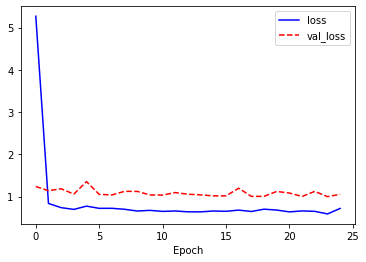

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

훈련 데이터의 손실이 비교적 꾸준히 감소하는 데 비해 붉은색 점선으로 표시된 검증 데이터의 손실은 항상 감소하지 않는다. 오히려 학습을 계속 할 수록 낮아지지 않고 현상이 유지되거나 점점 증가하는 모습을 보인다.

In [19]:
#테스트 데이터를 이용해 회귀모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.6985


0.6985446214675903

Text(0, 0.5, 'pred_Y')

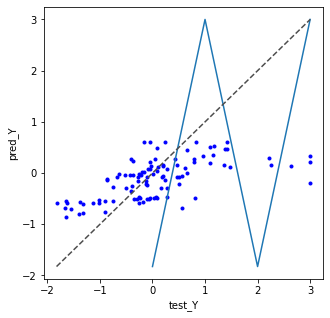

In [20]:
pred_Y=model.predict(test_X)
plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.plot([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

#y=x
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation = 'relu', input_shape = (13,)),
    tf.keras.layers.Dense(units=39, activation = 'relu'),
    tf.keras.layers.Dense(units=26, activation = 'relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)
callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]

Epoch 1/25
10/10 [==============================] - 0s 11ms/step - loss: 4.5733 - val_loss: 1.1960
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.9553 - val_loss: 1.2932
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.9262 - val_loss: 1.2924
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.9160 - val_loss: 1.2607
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.9081 - val_loss: 1.2828
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.9010 - val_loss: 1.2828
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.8954 - val_loss: 1.1957
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.9074 - val_loss: 1.1942
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.7853 - val_loss: 1.2250
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.7116 - val_loss: 1.1311
Epoch 11/25
10/10 